In [1]:
import sys, time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

%matplotlib inline

In [2]:
def linearconv(nx, nt):
    if not nx:
        nx = 50
    dx = 2 / (nx - 1)
    if not nt:
        nt = 80
    
    sigma = .1
    
    dt = sigma * dx
    c = 1

    u = np.ones(nx)
    u[int(.5/dx): int(1/dx)] = 2

    un = np.ones(nx)
    history = u.copy()

    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        history = np.row_stack((history, u))
    return history

nx = 41
nt = 2*nx
history = linearconv(nx, nt)

def linear_diffusion(nx, nt):
    if not nx:
        nx = 41
    dx = 2 / (nx - 1)
    if not nt:
        nt = 20
    nu = .3
    sigma = .2
    dt = sigma * dx**2 / nu
    
    u = np.ones(nx)
    u[int(0.5/dx): int(1/dx)] = 2
    history = u.copy()
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * (dt / dx**2 *
                                 (un[i+1] -
                                  2 * un[i] + un[i-1]))
        history = np.vstack((history, u))
    return history

history_1 = linear_diffusion(nx, nt)

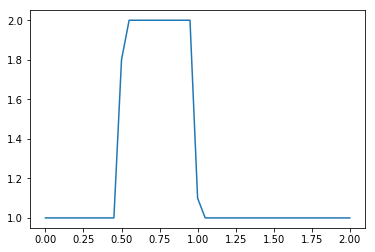

In [3]:
plt.plot(np.linspace(0, 2, nx), history[1])

In [4]:
history_1.shape

(83, 41)

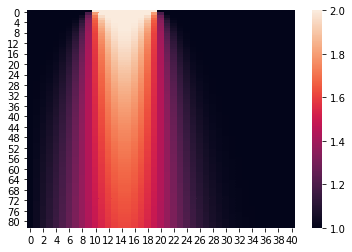

In [5]:
import seaborn as sns


sns.heatmap(history_1)

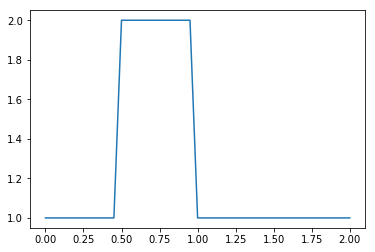

In [6]:
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, 2, nx), history_1[0])

def animate(i):
    line.set_ydata(history_1[i])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=nt, interval=20)
HTML(anim.to_html5_video())

In [7]:
# burger's equation
import sympy
from sympy import init_printing
init_printing(use_latex=True)

In [8]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
               sympy.exp(-(x - 4 * t - 2 * np.pi)**2 /
                        (4 * nu * (t + 1))))
phi

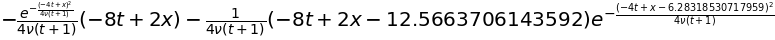

In [9]:
phiprime = phi.diff(x)
phiprime

In [10]:
u = -2 * nu * (phiprime / phi) + 4

from sympy.utilities.lambdify import lambdify
ufunc = lambdify((t, x, nu), u)
ufunc(1, 4, 3)

In [11]:
def burgers(nx, nt):
    if not nx:
        nx = 101
    if not nt:
        nt = 100
    dx = 2 * np.pi / (nx -1)
    nu = .07
    dt = dx * nu
    
    x = np.linspace(0, 2 * np.pi, nx)
    un = np.empty(nx)
    t = 0
    u = np.asarray([ufunc(t, x0, nu) for x0 in x])



#     fig, ax = plt.subplots()
#     ax.set_ylim([0, 10])
#     fig.set_size_inches(10, 8)
#     ax.plot(x, u, marker="o", lw=2, alpha=.4, color="#113544")
    
    history = u.copy()
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx-1):
            u[i] = (un[i] - un[i-1] * dt/ dx *(
                un[i] - un[i-1]) + nu * dt / dx**2 *
                   (un[i+1] - 2 * un[i] + un[i-1]))
            
            u[0] = (un[0] - un[0] * dt / dx * (un[0] - un[-1]) + nu * dt / dx**2 *
                (un[1] - 2 * un[0] + un[-1]))
            
            u[-1] = (un[-1] - un[-1] * dt / dx * (un[-1] - un[-2]) + nu * dt / dx**2 *
                (un[0] - 2 * un[-1] + un[-2]))
                
#             u[-1] = u[0]
        history = np.row_stack((history, u))
        
    return history

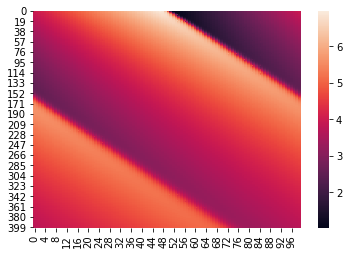

In [12]:
nx = 100
nt = 400
sns.heatmap(burgers(nx=nx, nt=nt))

Using matplotlib backend: Qt5Agg


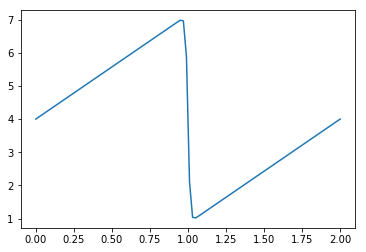

In [13]:
%matplotlib

def animate(history, nx, nt):
    fig, ax = plt.subplots()
    line, = ax.plot(np.linspace(0, 2, nx), history[0])

    def animate(i):
        line.set_ydata(history[i])
        return line,

    anim = animation.FuncAnimation(fig, animate, frames=nt, interval=20)
    # return anim.to_html5_video()
# HTML(animate(burgers(nx, nt), nx, nt))
animate(burgers(nx, nt), nx, nt)
plt.show()

In [ ]:
# numpy build-in functions
u = np.array([n for n in range(6)])
u[1:] - u[0:]